Leitura inicial do dataset, podendo ser identificado que há 7 colunas com dados do tipo float, 10 do tipo int e 6 do tipo string.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
df = pd.read_csv('BankChurners.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Realizada uma cópia do dataset para que alterações não interfiram no conjunto de dados original.

In [ ]:
df_2 = df.copy()

In [ ]:
df_2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Os dados foram obtidos através do repositório do kaggle. Uma das orientações desse dataset é a remoção das últimas duas colunas. Também optou-se pela remoção da coluna "CLIENTNUM", pois não há relevância para o presente trabalho.

In [ ]:
df_2.drop("CLIENTNUM", inplace = True, axis = 1)
df_2.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", inplace = True, axis = 1)
df_2.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", inplace = True, axis = 1)
df_2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Verificação se todas as colunas foram removidas.

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Em busca de valores nulos ou valores que possam alterar a análise dos dados, foi executada uma busca por esses tipos de valores, retornando um total de 0 incidências.

In [ ]:
df_2.isnull().values.any()

False

In [ ]:
print(f"\nNull Values %:\n{df_2.apply(lambda x: sum(x.isnull()) / len(df_2))}")


Null Values %:
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


A coluna "Attrition_Flag" representa um dado importante no dataset. Ela demonstra se o cliente é ativo ou é um cliente perdido. Por se tratar de dados financeiros de clientes, tal dado se torna um ponto de interessse fundamental nesse conjunto de dados. Conforme verificado abaixo, o percentual de clientes perdidos é de pouco mais de 16% do dataset. Adiante, deverá ser realizado o balanceamento dos dados para que estes não interfiram na análise dos classificadores.

In [ ]:
df_2['Attrition_Flag'].value_counts()


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
df_2['Attrition_Flag'].value_counts() * (100 / df_2.shape[0])

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

A seguir será elaborada uma série de gráficos, considerando uma análise explorativa das informações do dataset.

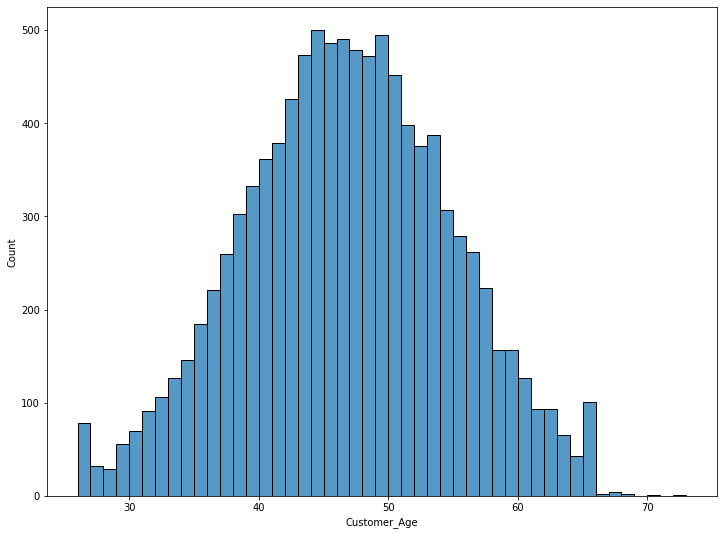

In [ ]:
plt.figure(figsize=(12,9))
sns.histplot(data=df_2['Customer_Age'])

Na plotagem do gráfico sobre a idade dos clientes, percebe-se que as idades se concentram na faixa dos 50 anos.

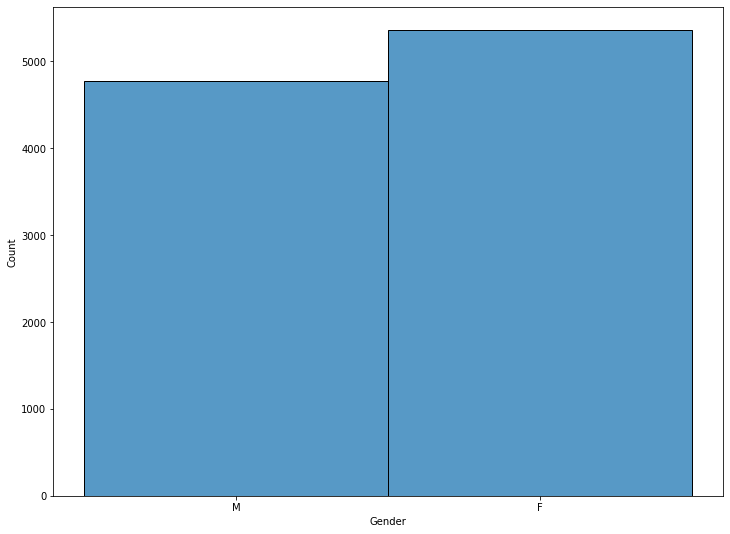

In [ ]:
plt.figure(figsize=(12,9))
sns.histplot(data=df_2['Gender'])

Com relação ao gênero dos clientes, percebe-se que há uma ligeira vantagem de pessoas do sexo feminino.

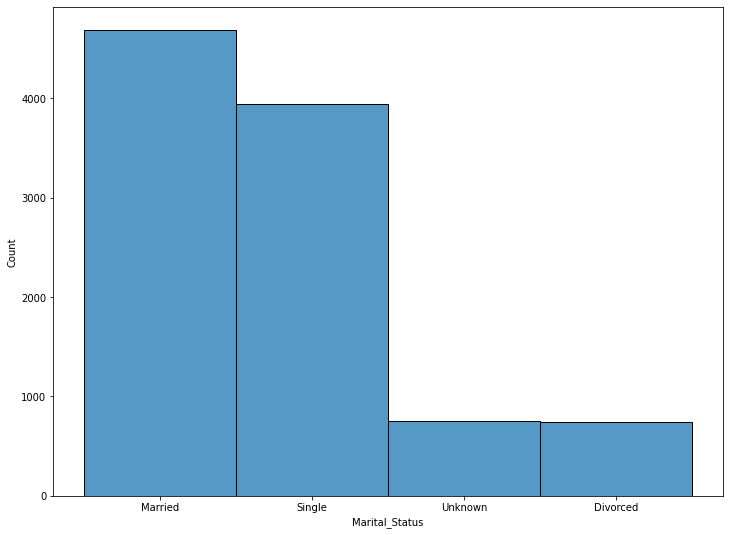

In [ ]:
plt.figure(figsize=(12,9))
sns.histplot(data=df_2['Marital_Status'])

Com relação ao estado civil, a maioria dos clientes são casados.

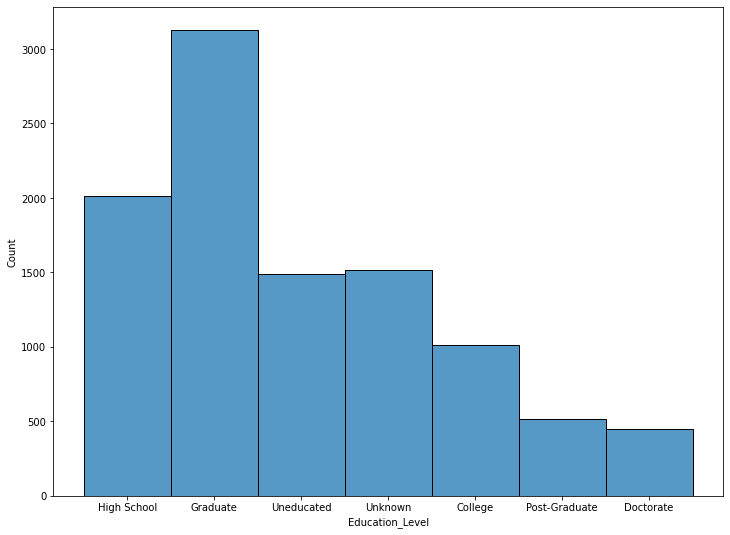

In [ ]:
plt.figure(figsize=(12,9))
sns.histplot(data=df_2['Education_Level'])

Com relação à escolaridade dos clientes, a maior parte deles possuem ensino superior seguido por aqueles que só possuem o ensino médio.

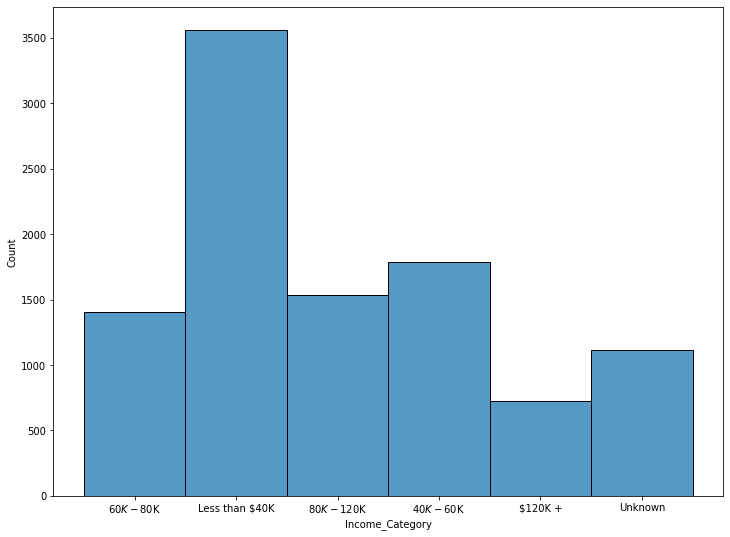

In [ ]:
plt.figure(figsize=(12,9))
sns.histplot(data=df_2['Income_Category'])

Já com relação à faixa de renda dos clientes, em sua grande maioria, possuem renda inferior à $40.000.

Agora será realizada uma busca por outliers em informações do dataset.

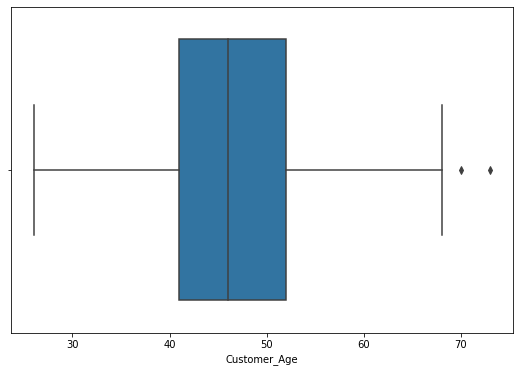

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x=df_2['Customer_Age'])

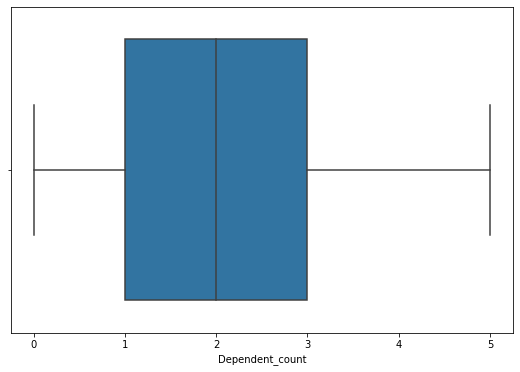

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x=df_2['Dependent_count'])

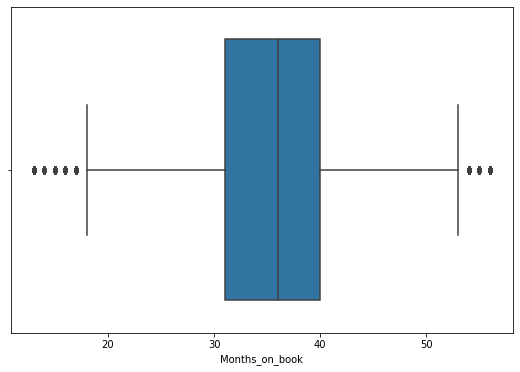

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x=df_2['Months_on_book'])

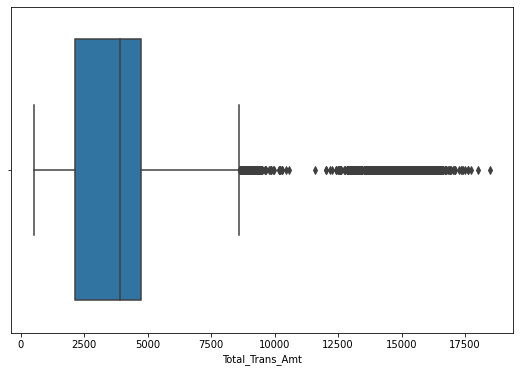

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x=df_2['Total_Trans_Amt'])

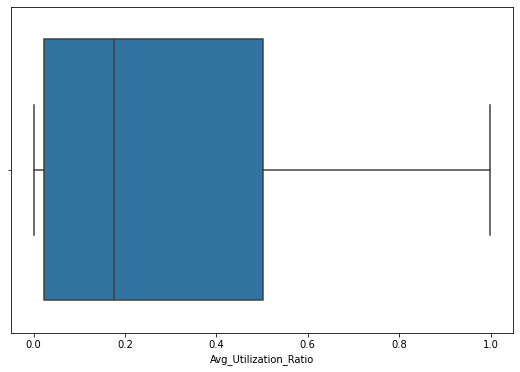

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x=df_2['Avg_Utilization_Ratio'])

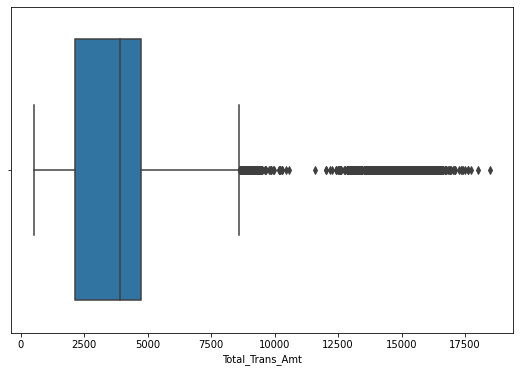

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x=df_2['Total_Trans_Amt'])

A seguir será realizado um levantamento de dispersão dos dados.

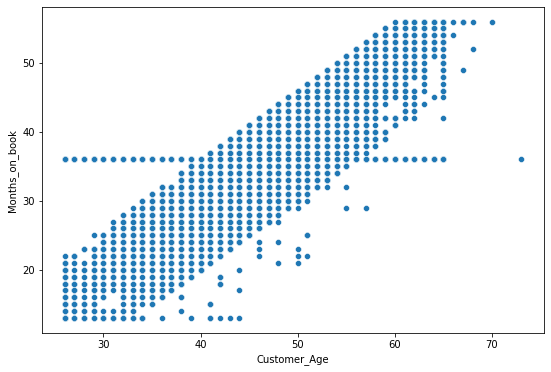

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_2, x='Customer_Age', y='Months_on_book')

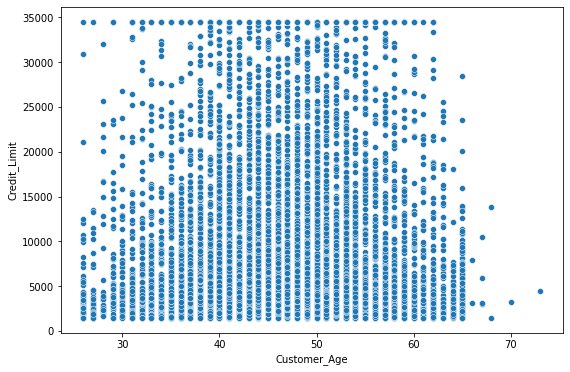

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_2, x='Customer_Age', y='Credit_Limit')

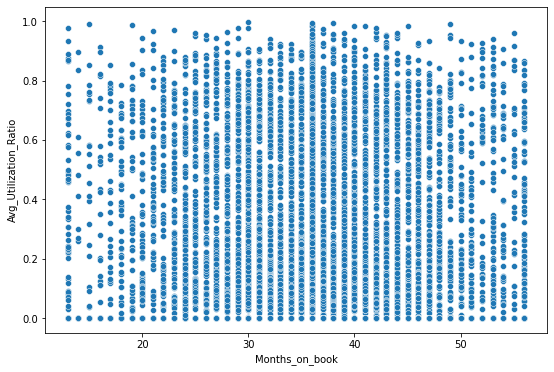

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_2, x='Months_on_book', y='Avg_Utilization_Ratio')

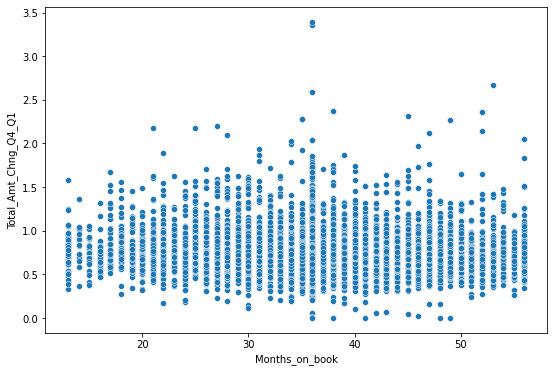

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_2, x='Months_on_book', y='Total_Amt_Chng_Q4_Q1')

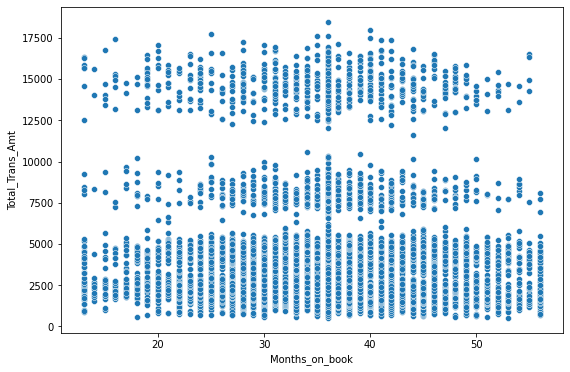

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_2, x='Months_on_book', y='Total_Trans_Amt')

A seguir serão apresentadas métricas para avaliação do modelo, nesse caso para métodos de classificação. Nesse conjunto de dados, o algorítimo será treinado para verificar se o cliente é ativo ou um cliente que foi perdido.

In [ ]:
df_3 = df_2.copy()
df_3

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Testes para conversão simbólico-numérica do modelo. Para isso foi criada uma cópia do dataset "df_2".

In [ ]:
ndf = df_3.sample(n=5, random_state=1)
ndf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,6,3,2,2570.0,2107,463.0,0.651,4058,83,0.766,0.820
9013,Existing Customer,38,F,1,College,Unknown,Less than $40K,Blue,32,2,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
2053,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,6,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478,0.107
3211,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,6,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596,0.073
5559,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,5,2,4,1614.0,0,1614.0,0.609,2437,46,0.438,0.000


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ndf['Attrition_Flag'] = oe.fit_transform(
    ndf['Attrition_Flag'].values.reshape(-1,1)
)
ndf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,1.0,43,F,2,Graduate,Married,Less than $40K,Blue,36,6,3,2,2570.0,2107,463.0,0.651,4058,83,0.766,0.820
9013,1.0,38,F,1,College,Unknown,Less than $40K,Blue,32,2,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
2053,1.0,39,M,2,College,Married,$60K - $80K,Blue,31,6,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478,0.107
3211,1.0,44,M,4,Graduate,Married,$120K +,Blue,32,6,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596,0.073
5559,0.0,38,F,2,Doctorate,Married,Less than $40K,Blue,28,5,2,4,1614.0,0,1614.0,0.609,2437,46,0.438,0.000


O que será feito a seguir é um balanceamento dos dados, tendo em vista que a quantidade de amostras de clientes perdidos é menor do que a de clientes ativos, conforme a seguir:

In [ ]:
df_3['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Processo de reamostragem:

In [ ]:
c_0 = df_3[df_3.Attrition_Flag == 'Existing Customer'].sample(n = 1627)
c_1 = df_3[df_3.Attrition_Flag == 'Attrited Customer']
df_3 = pd.concat([c_0,c_1])
df_3 = df_3.reset_index(drop=True)

In [ ]:
df_3['Attrition_Flag'].value_counts()

Existing Customer    1627
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
df_3

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,34,F,2,Doctorate,Single,Less than $40K,Blue,13,5,1,2,1438.3,0,1438.3,0.946,2557,67,0.763,0.000
1,Existing Customer,38,F,1,Doctorate,Single,Less than $40K,Blue,36,2,2,2,3466.0,2517,949.0,0.699,13140,94,0.709,0.726
2,Existing Customer,52,M,1,Post-Graduate,Unknown,$80K - $120K,Blue,40,2,1,2,5520.0,2448,3072.0,0.862,14330,116,0.681,0.443
3,Existing Customer,40,F,3,Graduate,Single,Less than $40K,Blue,27,5,3,4,6587.0,824,5763.0,1.262,4160,70,0.842,0.125
4,Existing Customer,58,M,2,Unknown,Divorced,$60K - $80K,Blue,36,6,1,1,1490.0,1069,421.0,0.840,3790,85,0.889,0.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
3250,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
3251,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
3252,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Conversão dos valores qualitativos para valores quantitativos:

Attrition_Flag

Gender

Education_Level

Marital_Status

Income_Category

Card_Category


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            3254 non-null   object 
 1   Customer_Age              3254 non-null   int64  
 2   Gender                    3254 non-null   object 
 3   Dependent_count           3254 non-null   int64  
 4   Education_Level           3254 non-null   object 
 5   Marital_Status            3254 non-null   object 
 6   Income_Category           3254 non-null   object 
 7   Card_Category             3254 non-null   object 
 8   Months_on_book            3254 non-null   int64  
 9   Total_Relationship_Count  3254 non-null   int64  
 10  Months_Inactive_12_mon    3254 non-null   int64  
 11  Contacts_Count_12_mon     3254 non-null   int64  
 12  Credit_Limit              3254 non-null   float64
 13  Total_Revolving_Bal       3254 non-null   int64  
 14  Avg_Open

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_3['Income_Category'] = oe.fit_transform(
    df_3['Income_Category'].values.reshape(-1,1)
)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_3['Gender'] = oe.fit_transform(
    df_3['Gender'].values.reshape(-1,1)
)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_3['Education_Level'] = oe.fit_transform(
    df_3['Education_Level'].values.reshape(-1,1)
)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_3['Marital_Status'] = oe.fit_transform(
    df_3['Marital_Status'].values.reshape(-1,1)
)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_3['Card_Category'] = oe.fit_transform(
    df_3['Card_Category'].values.reshape(-1,1)
)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_3['Attrition_Flag'] = oe.fit_transform(
    df_3['Attrition_Flag'].values.reshape(-1,1)
)

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            3254 non-null   float64
 1   Customer_Age              3254 non-null   int64  
 2   Gender                    3254 non-null   float64
 3   Dependent_count           3254 non-null   int64  
 4   Education_Level           3254 non-null   float64
 5   Marital_Status            3254 non-null   float64
 6   Income_Category           3254 non-null   float64
 7   Card_Category             3254 non-null   float64
 8   Months_on_book            3254 non-null   int64  
 9   Total_Relationship_Count  3254 non-null   int64  
 10  Months_Inactive_12_mon    3254 non-null   int64  
 11  Contacts_Count_12_mon     3254 non-null   int64  
 12  Credit_Limit              3254 non-null   float64
 13  Total_Revolving_Bal       3254 non-null   int64  
 14  Avg_Open

Classificador Naive Bayes - Treinamento do algorítmo

In [ ]:
from sklearn.model_selection import train_test_split
x = df_3.drop(['Attrition_Flag'], axis=1)
y= df_3['Attrition_Flag']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1
)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
nb_y_pred = nb.predict(x_test)
print('Acertou %d de %d.'
    % ((y_test == nb_y_pred).sum(), len(x_test))
)

Acertou 779 de 977.


Classificador K-Nearest Neighbours - Treinamento do algorítmo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=3, metric='euclidean'
)
knn = knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)
print('Acertou %d de %d.'
    % ((y_test == knn_y_pred).sum(), len(x_test))
)

Acertou 833 de 977.


Métricas para comparação dos classificadores

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
classes = oe.inverse_transform(
    df_3['Attrition_Flag'].values.reshape(-1, 1)
)
print(
    classification_report(
        y_test, nb_y_pred, target_names=np.unique(classes)
    )
)
print(
    classification_report(
        y_test, knn_y_pred, target_names=np.unique(classes)
    )
)

                   precision    recall  f1-score   support

Attrited Customer       0.75      0.86      0.80       467
Existing Customer       0.85      0.74      0.79       510

         accuracy                           0.80       977
        macro avg       0.80      0.80      0.80       977
     weighted avg       0.80      0.80      0.80       977

                   precision    recall  f1-score   support

Attrited Customer       0.85      0.84      0.85       467
Existing Customer       0.86      0.86      0.86       510

         accuracy                           0.85       977
        macro avg       0.85      0.85      0.85       977
     weighted avg       0.85      0.85      0.85       977



Agora serão processados os métodos para regressão do modelo. Será aplicada a regressão linear e as técnicas de regularização LASSO e Ridge. Para essa etapa será feita uma cópia do DataFrame original e com apenas as duas colunas necessárias para análise - Customer_Age e Months_on_book.

In [ ]:
df_reg = df[['Customer_Age', 'Months_on_book']].copy()
df_reg

,Customer_Age,Months_on_book
0,45,39
1,49,44
2,51,36
3,40,34
4,40,21
...,...,...
10122,50,40
10123,41,25
10124,44,36
10125,30,36


A seguir é feita a correlação entre a idade do cliente e o tempo que o cliente utiliza os serviços financeiros da instituição.

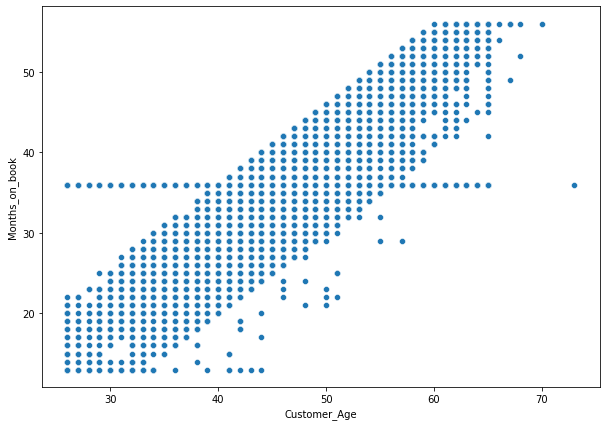

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_reg, x='Customer_Age', y='Months_on_book')

Separação do conjunto de treinamento e conjunto de teste.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df_reg.Customer_Age.values.reshape(-1, 1),
    df_reg.Months_on_book,
    test_size=0.3,
    random_state=1
)

Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

Apresentação gráfica da regressão linear:

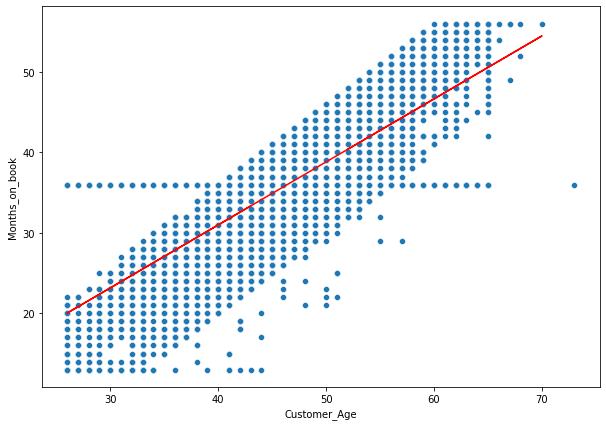

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_reg, x='Customer_Age', y='Months_on_book')
plt.plot(x_test, lr_pred, color='red')
plt.show()

Regularização LASSO

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

Demonstração gráfica da regularização LASSO

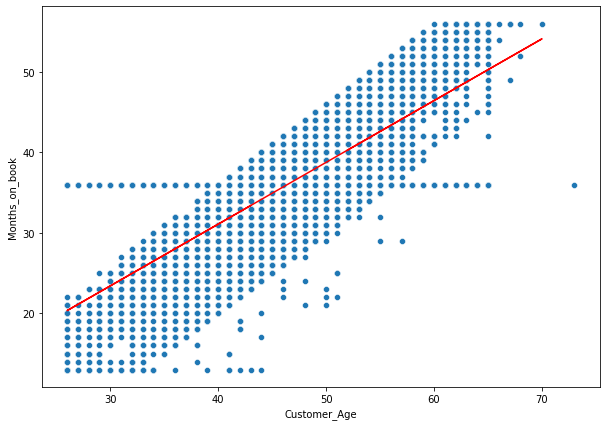

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_reg, x='Customer_Age', y='Months_on_book')
plt.plot(x_test, lasso_pred, color='red')
plt.show()

Regularização Ridge:

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

Demonstração gráfica da regularização Ridge:

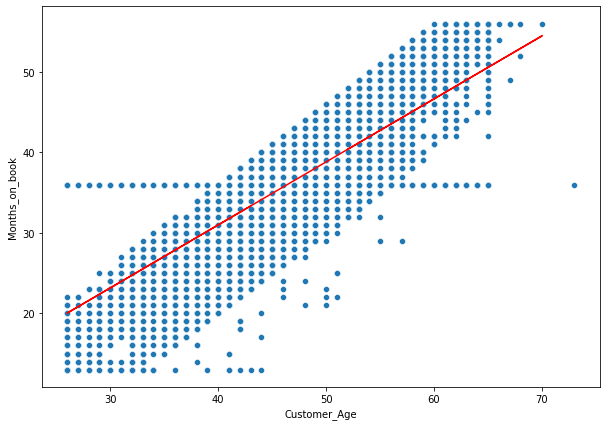

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_reg, x='Customer_Age', y='Months_on_book')
plt.plot(x_test, ridge_pred, color='red')
plt.show()

Avaliação dos regressores

Erro quadrático médio - MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
print(
    'Regressão linear: %f' %
    mean_squared_error(y_test, lr_pred)
)
print(
    'Lasso: %f' %
    mean_squared_error(y_test, lasso_pred)
)
print(
    'Ridge: %f' %
    mean_squared_error(y_test, ridge_pred)
)

Regressão linear: 23.927819
Lasso: 23.960683
Ridge: 23.927821


Distância absoluta média - MAD (Mean Absolute Distance)

In [ ]:
from sklearn.metrics import mean_absolute_error
print(
    'Regressão linear: %f' %
    mean_absolute_error(y_test, lr_pred)
)
print(
    'Lasso: %f' %
    mean_absolute_error(y_test, lasso_pred)
)
print(
    'Ridge: %f' %
    mean_absolute_error(y_test, ridge_pred)
)

Regressão linear: 3.886113
Lasso: 3.899477
Ridge: 3.886114
